# Often times, you might be missing dynamic data field along a track, or the data may be unreliable. This is particularly true with Speeds, Accelerations, Coursings, Turning Rates, etc.

# These can be derived from the spatiotemporal points if you need to replace/create them. As well, a number of features can be engineered from the data to aid in downstream ML applications.
___

In [1]:
import trackio as tio
import matplotlib.pyplot as plt
import numpy as np

## Let's use some of the AIS data we processed in the last notebook

In [2]:
#create the Dataset
ds = tio.read(data_path='example00')

___
## Coursing Computation

In [3]:
#define a track id
track_id = ds.tracks.index[44]

#get original track
original = ds.get_track(track_id)

In [4]:
#compute the coursing from the points
ds = ds.compute_coursing(tracks=[track_id],
                         method='middle')

Computing coursing: 100%|██████████| 1/1 [00:00<00:00, 142.81it/s]


In [5]:
#get computed track
computed = ds.get_track(track_id)

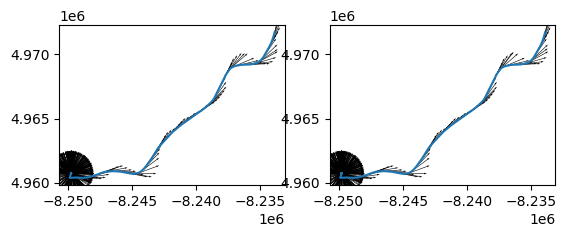

In [6]:
#plot the two
fig, ax = plt.subplots(1, 2)

#original
ax[0].plot(original['X'], original['Y'])
u = np.sin(np.radians(original['Coursing']))
v = np.cos(np.radians(original['Coursing']))
ax[0].quiver(original['X'], original['Y'], u, v, scale=10)
ax[0].set_aspect('equal')

#computed
ax[1].plot(computed['X'], computed['Y'])
u = np.sin(np.radians(computed['Coursing']))
v = np.cos(np.radians(computed['Coursing']))
ax[1].quiver(computed['X'], computed['Y'], u, v, scale=10)
ax[1].set_aspect('equal')

___
## Turning Rate Computation

## This simply uses the coursings, so make sure they're correct or compute them first.

In [7]:
#define a track id
track_id = ds.tracks.index[17]

#get original track
original = ds.get_track(track_id)

In [8]:
#compute the turning from the coursings - output is deg/sec
ds = ds.compute_turning_rate(tracks=[track_id],
                             method='middle')

Computing turning rate: 100%|██████████| 1/1 [00:00<00:00, 333.54it/s]


In [9]:
#get computed track
computed = ds.get_track(track_id)

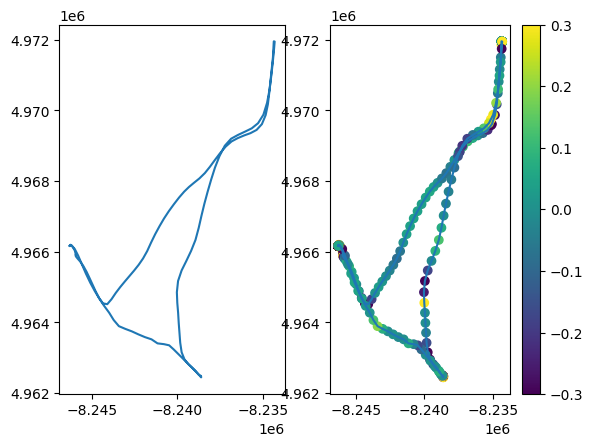

In [10]:
#plot the two
fig, ax = plt.subplots(1, 2)

#original didn't contain turning rate
ax[0].plot(original['X'], original['Y'])

#computed
ax[1].plot(computed['X'], computed['Y'])
m = ax[1].scatter(computed['X'], computed['Y'], c=computed['Turning Rate'], vmin=-0.3, vmax=0.3)
fig.colorbar(m)

___
## Speed Computation


In [11]:
#define a track id
track_id = ds.tracks.index[21]

#get original track
original = ds.get_track(track_id)

In [12]:
#compute the speed - units is CRS xy units per second (e.g. m/s, deg/s)
ds = ds.compute_speed(tracks=[track_id],
                      method='middle')

Computing speed: 100%|██████████| 1/1 [00:00<00:00, 333.52it/s]


In [13]:
#get computed track
computed = ds.get_track(track_id)

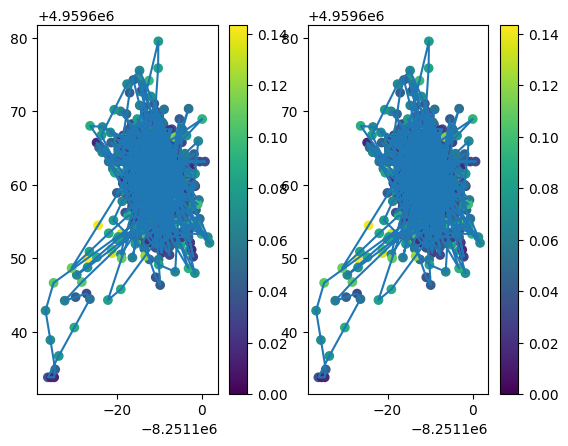

In [14]:
#plot the two
fig, ax = plt.subplots(1, 2)

#original
ax[0].plot(original['X'], original['Y'])
m = ax[0].scatter(original['X'], original['Y'], c=original['Speed'])
fig.colorbar(m)

#computed
ax[1].plot(computed['X'], computed['Y'])
m = ax[1].scatter(computed['X'], computed['Y'], c=computed['Speed'])
fig.colorbar(m)

___
## Acceleration Computation

## This simply uses the speeds, so make sure they're correct or compute them first.

In [15]:
#define a track id
track_id = ds.tracks.index[21]

#get original track
original = ds.get_track(track_id)

In [16]:
#compute the acceleration
ds = ds.compute_acceleration(tracks=[track_id],
                             method='middle')

Computing acceleration: 100%|██████████| 1/1 [00:00<00:00, 285.66it/s]


In [17]:
#get computed track
computed = ds.get_track(track_id)

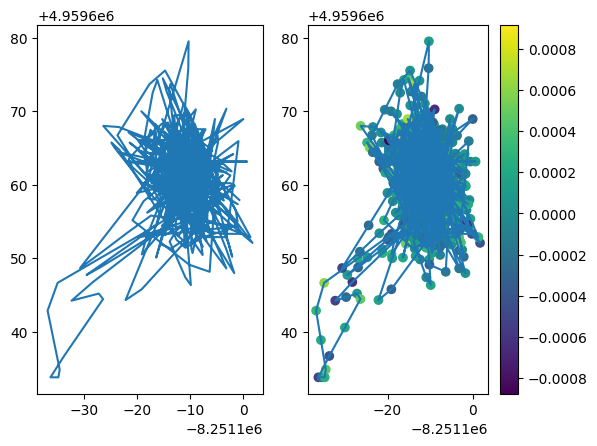

In [18]:
#plot the two
fig, ax = plt.subplots(1, 2)

#original didn't contain acceleration
ax[0].plot(original['X'], original['Y'])

#computed
ax[1].plot(computed['X'], computed['Y'])
m = ax[1].scatter(computed['X'], computed['Y'], c=computed['Acceleration'])
fig.colorbar(m)

___
## Distance Travelled

Cumulative distance travelled over the track

In [19]:
#define a track id
track_id = ds.tracks.index[50]

#compute distance travelled along track
ds = ds.compute_distance_travelled(tracks=[track_id])

Computing distance travelled along tracks: 100%|██████████| 1/1 [00:00<00:00, 126.28it/s]


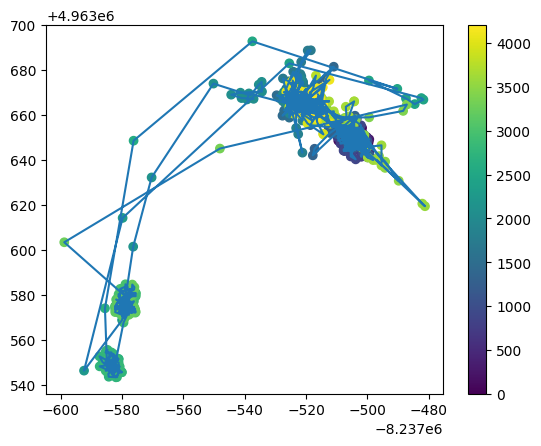

In [20]:
#get computed track
computed = ds.get_track(track_id)

#plot
fig, ax = plt.subplots()
ax.plot(computed['X'], computed['Y'])
m = ax.scatter(computed['X'], computed['Y'], c=computed['Distance Travelled'])
fig.colorbar(m)

___
## Radius of Curvature

In [27]:
#define a track id
track_id = ds.tracks.index[11]

#compute radius of curvature
ds = ds.compute_radius_of_curvature(tracks=[track_id])

Computing radius of curvature: 100%|██████████| 1/1 [00:00<00:00, 105.25it/s]


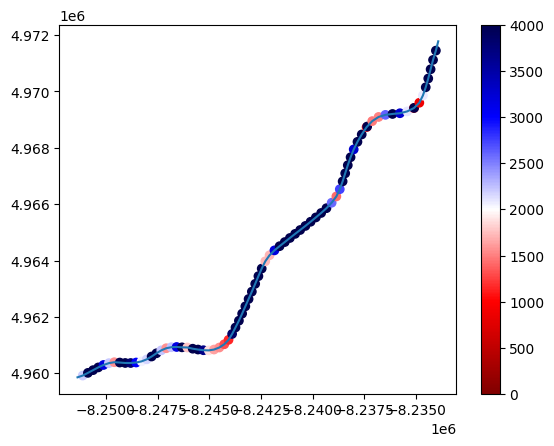

In [34]:
#get computed track
computed = ds.get_track(track_id)

#plot
fig, ax = plt.subplots()
ax.plot(computed['X'], computed['Y'])
m = ax.scatter(computed['X'], computed['Y'], c=computed['Radius of Curvature'], vmin=0, vmax=4000, cmap='seismic_r')
fig.colorbar(m)

___
## Sinuosity Computation

Here, sinuosity is calculated as the total length divided by the effective length (straight from start to end). A rolling window is applied to calculate the sinuosity from a localized segment around each point.

In [23]:
#define a track id
track_id = ds.tracks.index[48]

#compute radius of curvature
ds = ds.compute_sinuosity(tracks=[track_id], window=5)

Computing sinuosity:   0%|          | 0/1 [00:00<?, ?it/s]

Computing sinuosity: 100%|██████████| 1/1 [00:00<00:00, 27.78it/s]


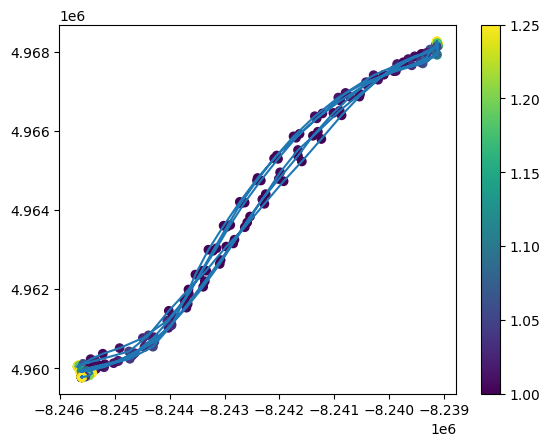

In [24]:
#get computed track
computed = ds.get_track(track_id)

#plot
fig, ax = plt.subplots()
ax.plot(computed['X'], computed['Y'])
m = ax.scatter(computed['X'], computed['Y'], c=computed['Sinuosity'], vmin=1, vmax=1.25)
fig.colorbar(m)

___
## Notice that during this process, all of these metadata properties were updated in the `repr` and `Dataset.meta` property.

In [25]:
ds = ds.refresh_meta(ncores=4)

ds

Refreshing metadata:   0%|          | 0/163 [00:00<?, ?it/s]

Refreshing metadata: 100%|██████████| 163/163 [00:02<00:00, 76.36it/s]  


New meta/databases saved to c:\code\trackio\notebooks\example00


Type:
    <class 'trackio.Dataset.Dataset'>
Status:
    0 Unprocessed CSV Files
    0 Processed CSV Files
    0 Unsplit Agent Files
    163 Split Agent Files
Static Data Fields:
    ['Agent ID', 'MMSI']
Dynamic Data Fields:
    ['Acceleration', 'Characteristic', 'Code100', 'Code101', 'Code102', 'Code103', 'Code104', 'Code105', 'Code106', 'Code107', 'Code16', 'Coursing', 'Distance Travelled', 'Polygon', 'Radius of Curvature', 'Raster', 'Sinuosity', 'Speed', 'Time', 'Turning Rate', 'Which Polygon?', 'X', 'Y']
Metadata:
    X: metre
    Y: metre
    CRS: EPSG:3857
    Coursing: degrees
    Turning Rate: degrees/sec
    Speed: metre/second
    Acceleration: metre/second/second
    Distance Travelled: metre
    Radius of Curvature: metre
    Sinuosity: non-dimensional
    Code16: Inside Polygon
    Code100: Inside Polygon
    Code101: Inside Polygon
    Code102: Inside Polygon
    Code103: Inside Polygon
    Code104: Inside Polygon
    Code105: Inside Polygon
    Code106: Inside Polygon
   